<a href="https://colab.research.google.com/github/Harsha1569/CS252-Assignment/blob/main/CS351_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [11]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#setting parameters for plots

%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

##Load Dataset

In [ ]:
#loading data from CSV file

rain_df = pd.read_csv('weatherAUS.csv')

# Checking the Dimensions of Dataset: 

print(rain_df.shape)

(145460, 23)


##Data Preprocessing

In [ ]:
# A concise summary of a Dataset

print(rain_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Finding Categorical and Numerical Features in a Data set:

In [ ]:
# Categorical features in Dataset:
categorical_features = [column_name for column_name in rain_df.columns if rain_df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Numerical Features in Dataset:

numerical_features = [column_name for column_name in rain_df.columns if rain_df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Dropping Values that add no value to the model

In [ ]:
# Removing/Dropping the date feature name

rain_df.drop('Date', axis = 1, inplace = True)
rain_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Handling Missing Values

In [ ]:
# Handling Missing values in Categorical Features

categorical_features = [column_name for column_name in rain_df.columns if rain_df[column_name].dtype == 'O']
rain_df[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
# Imputing the missing values in categorical features using the most frequent value i.e., the mode value:

categorical_features_with_null = [feature for feature in categorical_features if rain_df[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = rain_df[each_feature].mode()[0]
    rain_df[each_feature].fillna(mode_val,inplace=True)

Outlier detection and removal

In [ ]:
# Outlier Treatment to remove outliers from Numerical Features:

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = rain_df[feature].quantile(0.25)
    q3 = rain_df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain_df.loc[rain_df[feature]<lower_limit,feature] = lower_limit
    rain_df.loc[rain_df[feature]>upper_limit,feature] = upper_limit

In [ ]:
#Imputing missing values in numerical features using mean value:

numerical_features_with_null = [feature for feature in numerical_features if rain_df[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = rain_df[feature].mean()
    rain_df[feature].fillna(mean_value,inplace=True)

Encoding of Categorical Features

In [ ]:
#The below function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.
def encode_data(feature_name):
  mapping_dict = {}
  unique_values = list(rain_df[feature_name].unique())
  for idx in range(len(unique_values)):
    mapping_dict[unique_values[idx]] = idx
  return mapping_dict

rain_df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
rain_df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)
rain_df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)
rain_df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)
rain_df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)
rain_df['Location'].replace(encode_data('Location'), inplace = True)

 Splitting data into Independent Features and Dependent Features

In [ ]:
X = rain_df.drop(['RainTomorrow'],axis=1)
y = rain_df['RainTomorrow']

##Splitting Data into training and Testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Length of Training and Testing set
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


In [ ]:
y_test.value_counts()

0    22726
1     6366
Name: RainTomorrow, dtype: int64

##Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Logistic Regression 

In [ ]:
#Model building

from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(random_state=0, solver='liblinear')
classifier_logreg.fit(X_train, y_train)



LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#Model Testing

y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Evaluating performance metrics of model

In [ ]:
#Checking accuracy score

from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8439777258352812


In [ ]:
# Checking for Underfitting and Overfitting:

print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.843805857280352
Test Data Score: 0.8439777258352812


Confusion matrix, without normalization


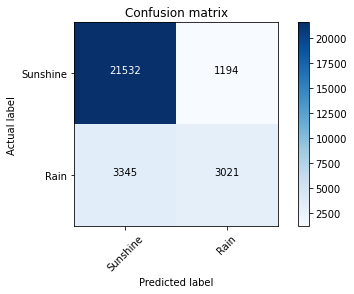

In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
       
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test,y_pred)
#print(cm)
plot_confusion_matrix(cm, classes=['Sunshine', 'Rain'])

In [ ]:
# Classification-report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22726
           1       0.72      0.47      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



##SVM (State Vector Machines)

In [ ]:
#Model Building

from sklearn.svm import SVC
classifier_svm = SVC()
classifier_svm.fit(X_train, y_train)

SVC()

In [ ]:
#Model testing

y_pred_svm = classifier_svm.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

Evaluating Performance Metrics of Model

In [ ]:
#Checking accuracy score

from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_svm)))

Accuracy Score: 0.8537398597552591


In [ ]:
# Checking for Underfitting and Overfitting:

print("Train Data Score: {}".format(classifier_svm.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_svm.score(X_test, y_test)))

Train Data Score: 0.8607778770796095
Test Data Score: 0.8537398597552591


Confusion matrix, without normalization


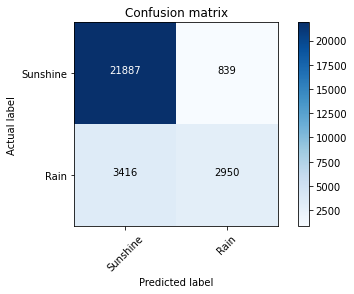

In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
       
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test,y_pred_svm)
#print(cm)
plot_confusion_matrix(cm, classes=['Sunshine', 'Rain'])

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22726
           1       0.78      0.46      0.58      6366

    accuracy                           0.85     29092
   macro avg       0.82      0.71      0.75     29092
weighted avg       0.85      0.85      0.84     29092



##KNN (K-Nearest Neighbours)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = classifier_knn.predict(X_test)
y_pred_knn

array([1, 0, 0, ..., 0, 0, 0])

Evaluating Performance metrics of Model

In [ ]:
#Checking accuracy score

from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_knn)))

Accuracy Score: 0.8347655712910765


In [ ]:
# Checking for Underfitting and Overfitting:

print("Train Data Score: {}".format(classifier_knn.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_knn.score(X_test, y_test)))

Train Data Score: 0.8794084284339337
Test Data Score: 0.8347655712910765


Confusion matrix, without normalization


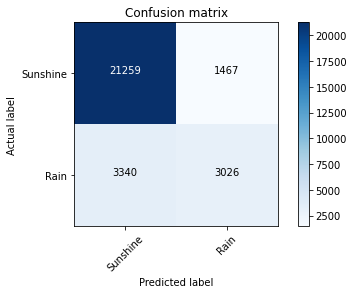

In [ ]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
       
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test,y_pred_knn)
#print(cm)
plot_confusion_matrix(cm, classes=['Sunshine', 'Rain'])

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22726
           1       0.67      0.48      0.56      6366

    accuracy                           0.83     29092
   macro avg       0.77      0.71      0.73     29092
weighted avg       0.82      0.83      0.82     29092



###Inferences

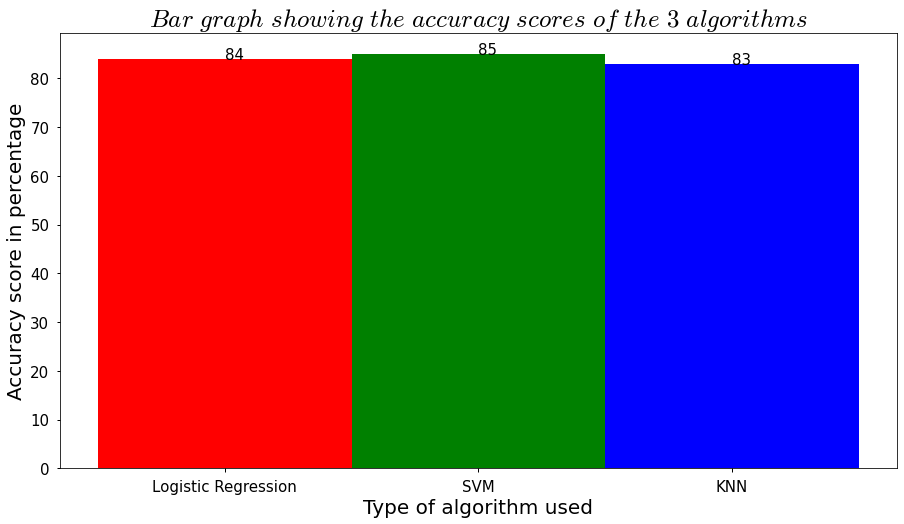

In [28]:
#Plotting bar-graph of accuracy scores

logreg_acc_score = 84
svm_acc_score = 85
knn_acc_score = 83


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], size=15)

fig = plt.figure()
X_axis = ['Logistic Regression', 'SVM', 'KNN']
Y_axis = [logreg_acc_score,svm_acc_score,knn_acc_score]
plt.bar(X_axis,Y_axis, color=['red', 'green', 'blue'],  width = 1.0)
plt.xlabel("Type of algorithm used", size =20)
plt.ylabel("Accuracy score in percentage", size =20)
plt.title(r"$Bar\ graph\ showing\ the\ accuracy\ scores\ of\ the\ 3\ algorithms$", size =25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
addlabels(X_axis, Y_axis)
plt.show()